51
100
105
256


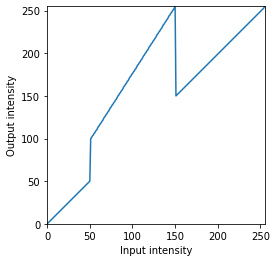

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


''' Quesstion one '''

t1 = np.linspace(0, 50, 51).astype('uint8')
print(len(t1))

t2 = np.linspace(100, 255, 100).astype('uint8')
print(len(t2))

t3 = np.linspace(150, 255, 255 - 150).astype('uint8')
print(len(t3))

transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')

print(len(transform))

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel('Input intensity')
ax.set_ylabel('Output intensity')
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_aspect('equal')
plt.savefig('transform.png')
plt.show()

img_orig = cv.imread('./emma.jpg', cv.IMREAD_GRAYSCALE)
cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
cv.imshow("Image", img_orig)
cv.waitKey(0)

image_transformed = cv.LUT(img_orig, transform)
cv.imshow("Image", image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()
cv.imwrite('transformed_emma.jpg', image_transformed)


151
50
55
256


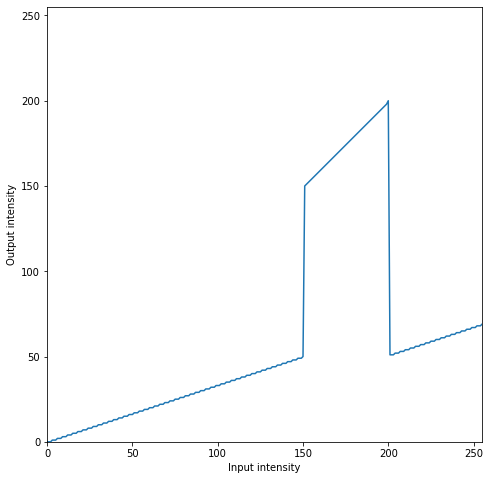

In [8]:
''' Quesstion two (a)'''

# import cv2 as cv
# import numpy as np
# import matplotlib.pyplot as plt

t1 = np.linspace(0, 50, 150-0+1).astype('uint8')
print(len(t1))

t2 = np.linspace(150, 200, 200-150).astype('uint8')
print(len(t2))

t3 = np.linspace(51, 69, 255 - 200).astype('uint8')
print(len(t3))

transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')

print(len(transform))

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(transform)
ax.set_xlabel('Input intensity')
ax.set_ylabel('Output intensity')
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_aspect('equal')
plt.savefig('gray_incr.png')
plt.show()

# img_orig = cv.imread('./BrainProtonDensitySlice9.png', cv.IMREAD_GRAYSCALE)
# cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
# cv.imshow("Image", img_orig)
# # cv.waitKey(0)

# image_transformed = cv.LUT(img_orig, transform)
# cv.imshow("Garish_Image", image_transformed)
# cv.waitKey(0)
# cv.destroyAllWindows()
cv.imwrite('Grayish_Image.jpg', image_transformed)


In [31]:
transform


array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50, 100,
       101, 103, 104, 106, 107, 109, 110, 112, 114, 115, 117, 118, 120,
       121, 123, 125, 126, 128, 129, 131, 132, 134, 136, 137, 139, 140,
       142, 143, 145, 146, 148, 150, 151, 153, 154, 156, 157, 159, 161,
       162, 164, 165, 167, 168, 170, 172, 173, 175, 176, 178, 179, 181,
       182, 184, 186, 187, 189, 190, 192, 193, 195, 197, 198, 200, 201,
       203, 204, 206, 208, 209, 211, 212, 214, 215, 217, 218, 220, 222,
       223, 225, 226, 228, 229, 231, 233, 234, 236, 237, 239, 240, 242,
       244, 245, 247, 248, 250, 251, 253, 255, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 17

201
55
256


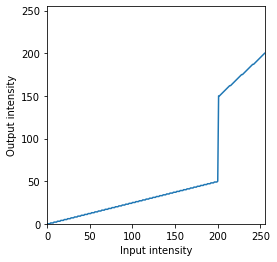

True

In [18]:
''' Quesstion two (b)'''

# import cv2 as cv
# import numpy as np
# import matplotlib.pyplot as plt

t1 = np.linspace(0, 50, 200-0+1).astype('uint8')
print(len(t1))

t2 = np.linspace(150, 200, 255-200).astype('uint8')
print(len(t2))

# t3 = np.linspace(51, 69, 255 - 200).astype('uint8')
# print(len(t3))

transform = np.concatenate((t1, t2), axis=0).astype('uint8')
# transform = np.concatenate((transform, t3), axis=0).astype('uint8')

print(len(transform))

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel('Input intensity')
ax.set_ylabel('Output intensity')
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_aspect('equal')
plt.savefig('white_incr.png')
plt.show()

img_orig = cv.imread('./BrainProtonDensitySlice9.png', cv.IMREAD_GRAYSCALE)
cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
cv.imshow("Image", img_orig)
# cv.waitKey(0)

image_transformed = cv.LUT(img_orig, transform)
cv.imshow("Whitish_Image", image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()
cv.imwrite('Whitish_Image.jpg', image_transformed)


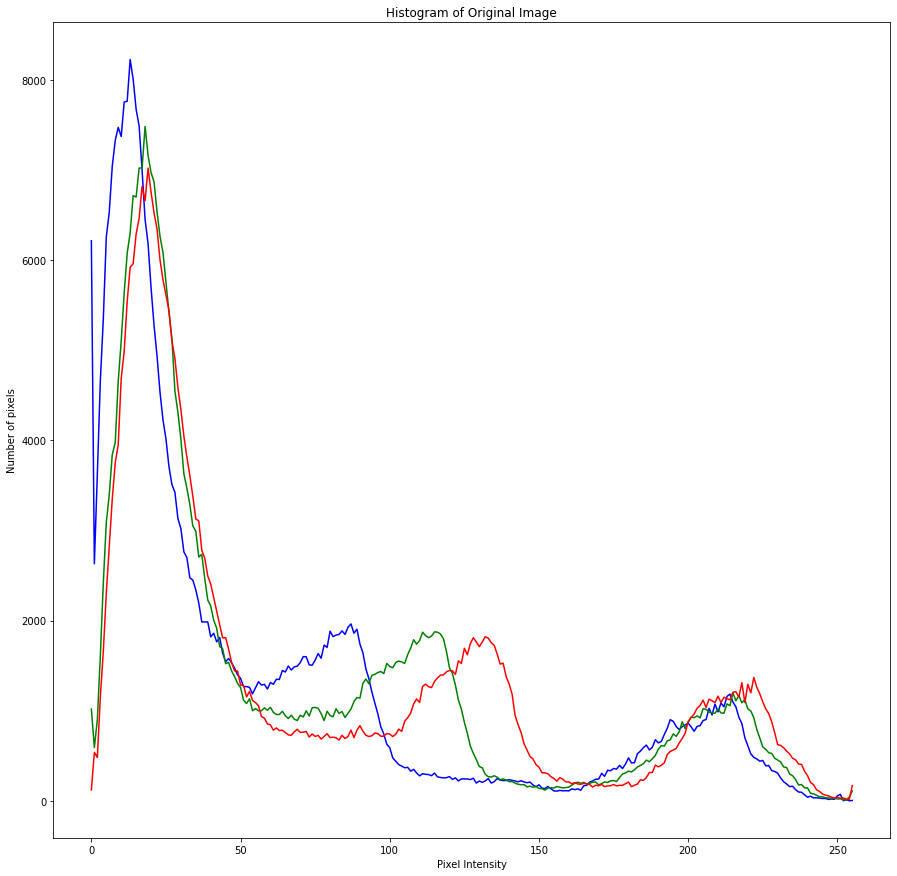

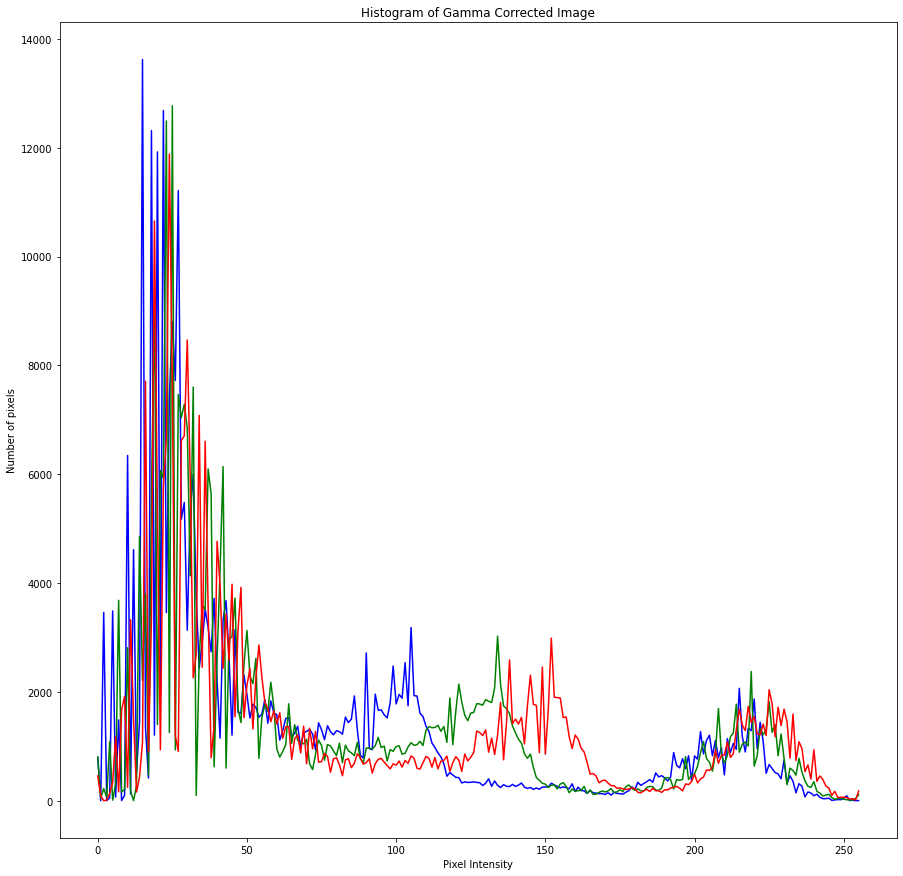

In [17]:
''' Quession three'''

img_orig = cv.imread('./Images/highlights_and_shadows.jpg', cv.IMREAD_COLOR)

# convert to "L*a*b*" color space
img_lab = cv.cvtColor(img_orig, cv.COLOR_BGR2LAB)

gamma = 0.8
table = np.array([(i/255.0)**(gamma)*255.0 for i in np.arange(0, 256)]).astype('uint8')
L_img = cv.LUT(img_lab[:,:,0], table).reshape(img_lab.shape[0], img_lab.shape[1], 1)
corrected_img=np.concatenate([L_img, img_lab[:,:,1:]], axis=-1)

img_gamma = cv.cvtColor(corrected_img, cv.COLOR_LAB2BGR)


cv.imshow("Image", img_orig)
cv.imshow("Gamma_Corrected_Image", img_gamma)
cv.imwrite('./Outputs/Original_Image.jpg', img_orig)
cv.imwrite('./Outputs/Gamma_Corrected_Image.jpg', img_gamma)

cv.waitKey(0)
cv.destroyAllWindows()

color = ('b', 'g', 'r')
plt.figure(figsize=(15, 15))
for i, c in enumerate(color):
    hist_orig = cv.calcHist([img_orig], [i], None, [256], [0, 256])
    plt.plot(hist_orig, color=c)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Number of pixels')
    plt.title('Histogram of Original Image')

plt.figure(figsize=(15, 15))

for i, c in enumerate(color):
    hist_gamma = cv.calcHist([img_gamma], [i], None, [256], [0, 256])
    plt.plot(hist_gamma, color=c)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Number of pixels')
    plt.title('Histogram of Gamma Corrected Image')


plt.show()


In [21]:
''' Qessiton four '''

import cv2 as cv
import numpy as np
import math
import matplotlib.pyplot as plt

alpha = 0.5


def f(x): return min(x + alpha*128*math.exp(-(x-128)**2/(2*70**2)), 255)


# Load the image
image = cv.imread('./Images/spider.png')

# Convert the image to HSV color space
hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)

# Split the HSV image into components
hue, saturation, value = cv.split(hsv_image)

transformed_saturation = np.vectorize(f)(saturation)
transformed_saturation = np.round(transformed_saturation).astype('uint8')
hsv_image[:, :, 1] = transformed_saturation

# Convert back to BGR color space
transformed_image = cv.cvtColor(hsv_image, cv.COLOR_HSV2BGR)

# cv.imshow('transformed_saturation', transformed_saturation)

# Display the original and transformed images
# cv.imshow('Original Image', image)
cv.imshow('Transformed Image', transformed_image)
# cv.imwrite('Sat_Transformed_Image.jpg', transformed_image)

# Display the components
# cv.imshow('Hue', hue)
# cv.imshow('Saturation', saturation)
# cv.imshow('Value', value)
# cv.imwrite('Hue.jpg', hue)
# cv.imwrite('Saturation.jpg', saturation)
# cv.imwrite('Value.jpg', value)

cv.waitKey(0)
cv.destroyAllWindows()


Text(0.5, 1.0, 'Transformation function')

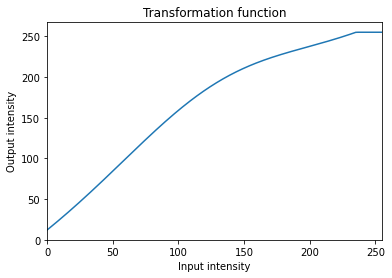

In [5]:
pixel_intensity = np.linspace(0, 255, 256).astype('uint8')
transformed_pixel_intensity = np.vectorize(f)(pixel_intensity)
plt.plot(pixel_intensity, transformed_pixel_intensity)
plt.xlabel('Input intensity')
plt.ylabel('Output intensity')
plt.xlim(0, 255)
plt.title('Transformation function')

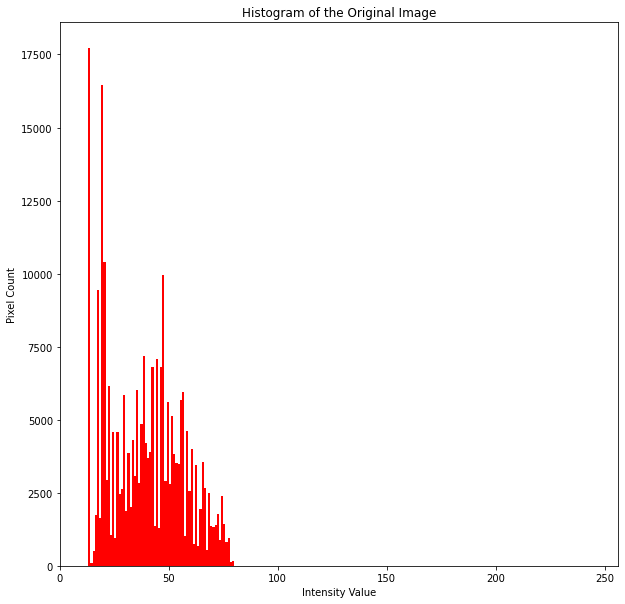

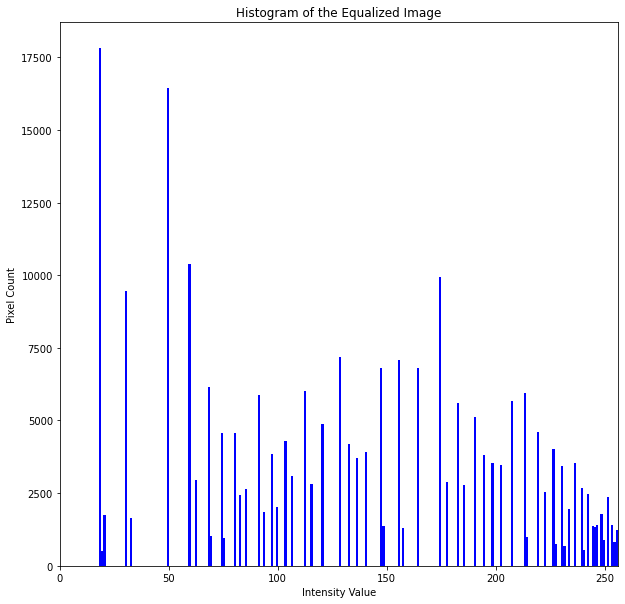

In [23]:
''' Qessiton five '''

import numpy as np
import matplotlib.pyplot as plt

# Load your grayscale image
image = cv.imread('./Images/shells.tif', cv.IMREAD_GRAYSCALE)

# Display original and equalized images
hist = cv.calcHist([image],[0],None,[256],[0,256])
plt.figure(figsize=(10, 10))
plt.hist(image.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
plt.xlabel('Intensity Value')
plt.ylabel('Pixel Count')
plt.title('Histogram of the Original Image')


sum_n = np.cumsum(hist)
equalized_r = np.round(
    (255*sum_n)/(image.shape[0]*image.shape[1])).astype('uint8')
equalized_img = cv.LUT(image, equalized_r)

# plt.figure(figsize=(10, 10))
# plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB), cmap='gray')
# plt.title('Original Image')

# plt.figure(figsize=(10, 10))
# plt.imshow(cv.cvtColor(equalized_img, cv.COLOR_BGR2RGB), cmap='gray')
# plt.title('Equalized Image')

cv.imshow('Original Image', image)
cv.imshow('Equalized Image', equalized_img)
cv.imwrite('/Outputs/q5_2.jpg', image)
cv.imwrite('/Outputs/q5_3.jpg', equalized_img)

cv.waitKey(0)
cv.destroyAllWindows()


plt.figure(figsize=(10, 10))
plt.hist(equalized_img.flatten(), 256, [0, 256], color='b')
plt.xlim([0, 256])
plt.xlabel('Intensity Value')
plt.ylabel('Pixel Count')
plt.title('Histogram of the Equalized Image')

plt.show()


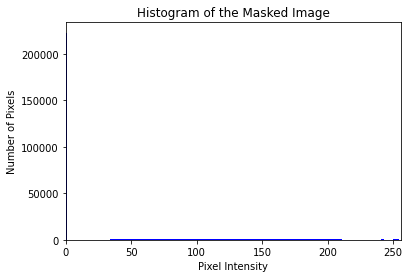

In [15]:
''' Qession six '''
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv.imread('./jeniffer.jpg')

scale_percent = 0.2  # percent of original size
width = int(image.shape[1] * scale_percent)
height = int(image.shape[0] * scale_percent)
dim = (width, height)

# resize image
resized = cv.resize(image, dim, interpolation=cv.INTER_AREA)

# Convert the image to HSV color space
hsv_image = cv.cvtColor(resized, cv.COLOR_BGR2HSV)

# Split the HSV image into components
hue, saturation, value = cv.split(hsv_image)
# threshold saturation image
thresh1 = cv.threshold(saturation, 11, 255, cv.THRESH_BINARY)[1]
for_grnd = cv.bitwise_and(value, thresh1)
plt.hist(for_grnd.flatten(), 256, [0, 256], color='b')
plt.xlim([0, 256])
plt.title('Histogram of the Masked Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Number of Pixels')
plt.show()
cv.imshow('for_grnd', for_grnd)
# cv.imwrite('for_grnd.jpg', for_grnd)

# cv.imshow('hue', hue)
# cv.imshow('saturation', saturation)
# cv.imshow('value', value)
# cv.imwrite('hue_jen.jpg', hue)
# cv.imwrite('saturation_jen.jpg', saturation)
# cv.imwrite('value_jen.jpg', value)

cv.waitKey(0)
cv.destroyAllWindows()


hist, bins = np.histogram(for_grnd.ravel(), 256, [0, 256])
cdf = hist.cumsum()


In [2]:
cdf


array([222621, 222630, 222641, 222659, 222684, 222772, 222806, 222842,
       222899, 222946, 222995, 223063, 223157, 223241, 223332, 223448,
       223603, 223786, 223952, 224173, 224384, 224592, 224844, 225070,
       225337, 225582, 225814, 226064, 226311, 226591, 226850, 227168,
       227457, 227764, 228106, 228483, 228912, 229252, 229684, 230083,
       230548, 230943, 231435, 231933, 232401, 233413, 233954, 234580,
       235596, 236146, 236893, 237428, 238049, 238567, 239100, 239656,
       240247, 240776, 241327, 241862, 242475, 243021, 243687, 244298,
       244936, 245496, 246059, 246706, 247231, 247757, 248327, 248836,
       249334, 249796, 250313, 250814, 251298, 251767, 252251, 252753,
       253166, 253600, 254050, 254549, 254999, 255465, 255906, 256392,
       256820, 257289, 257743, 258182, 258630, 259107, 259583, 260026,
       260507, 260946, 261417, 261880, 262341, 262831, 263335, 263831,
       264319, 264851, 265396, 265923, 266468, 267051, 267644, 268183,
      

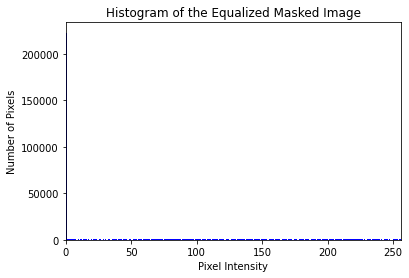

In [3]:
equ = cv.equalizeHist(for_grnd)
plt.hist(equ.flatten(), 256, [0, 256], color='b')
plt.xlim([0, 256])
plt.title('Histogram of the Equalized Masked Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Number of Pixels')
plt.show()
cv.imshow('for_grnd', equ)
cv.imwrite('for_grnd_eq.jpg', equ)

cv.waitKey(0)
cv.destroyAllWindows()


In [19]:
# bak_grnd=cv.bitwise_not(value, thresh1)
bak_grnd = value.copy()-for_grnd.copy()
processed_img = equ.copy()+bak_grnd.copy()
cv.imshow('processed_image', processed_img)
cv.imwrite('processed_image.jpg', processed_img)


cv.waitKey(0)
cv.destroyAllWindows()


In [25]:
''' Qession seven '''

img = cv.imread('./Images/einstein.png')

kernel = np.array([[1, 0, -1],
                   [2, 0, -2],
                   [1, 0, -1]], dtype='float')
imgc = cv.filter2D(src=img, ddepth=-1, kernel=kernel)

# Display the images
cv.imshow('Original', img)
cv.imshow('Sobel Filtered', imgc)
cv.imwrite('./Outputs/Sobel_Filtered-1.jpg', imgc)

cv.waitKey(0)
cv.destroyAllWindows()


In [26]:
import numpy as np

sobel_img=np.zeros(img.shape)
rows, cols = img.shape

padding=0
padded=np.full((rows+2, cols+2), padding,dtype=np.uint8)


# copy img image into center of result image
padded[1:rows + 1, 1:cols + 1] = img


for i in range(rows):
    for j in range(cols):
        sobel_img[i,j] = np.sum(np.multiply(kernel, padded[i:i + 3, j:j + 3]))

# Display the images
cv.imshow('Original', albert_img)
cv.imshow('Sobel Filtered', sobel_img)
# cv.imwrite('Sobel_Filtered.jpg', sobel_img)

cv.waitKey(0)
cv.destroyAllWindows()


ValueError: too many values to unpack (expected 2)

In [94]:
''' Qession eight'''

# Load the original image
# small_image = cv.imread('./zooming/im01small.png')
# original_image = cv.imread('./zooming/im01.png')

# small_image = cv.imread('./zooming/im02small.png')
# original_image = cv.imread('./zooming/im02.png')

small_image = cv.imread('./zooming/im06small.png')
original_image = cv.imread('./zooming/im06.png')

# Define the desired dimensions for the resized image
scaling_factor = 4
height, width = small_image.shape[:2]

height = int(height * scaling_factor)
width = int(width * scaling_factor)

# Perform nearest-neighbor resizing
resized_image1 = cv.resize(
    small_image.copy(), (width, height), interpolation=cv.INTER_NEAREST)
resized_image2 = cv.resize(
    small_image.copy(), (width, height), interpolation=cv.INTER_CUBIC)

ssd_val_ner = np.sum((original_image[:, :, 0:3]-resized_image1[:, :, 0:3])**2)
ssd_val_cub = np.sum((original_image[:, :, 0:3]-resized_image2[:, :, 0:3])**2)

print(ssd_val_ner)
print(ssd_val_cub)

# Display the original and resized images
cv.imshow('Original Image', small_image)
cv.imshow('Resized Image Nearest', resized_image1)
cv.imwrite('im06scalled_ner.jpg', resized_image1)
cv.imshow('Resized Image Cubic', resized_image2)
cv.imwrite('im06scalled_cub.jpg', resized_image2)

# Wait for a key press and close the windows
cv.waitKey(0)
cv.destroyAllWindows()


190070298
188095475


In [15]:
''' Qession nine'''

# Load the image
img = cv.imread('./flower.png')  # Replace 'your_image.jpg' with the actual image filename

# Create an initial mask and model arrays
mask = np.zeros(img.shape[:2], np.uint8)
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# Define the region of interest (rect) for the object you want to extract
rect = (50, 100, 450, 450)  # Adjust the coordinates to your specific region

# Apply the GrabCut algorithm
cv.grabCut(img, mask, rect, bgdModel, fgdModel, 5, cv.GC_INIT_WITH_RECT)

# Create a binary mask where foreground pixels are set to 1 and background pixels to 0
maskforg = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
maskbkg = np.where((mask == 2) | (mask == 0), 1, 0).astype('uint8')


themask = np.where((mask == 2) | (mask == 0), 0, 255).astype('uint8')

# Apply the mask to the original image to extract the foreground
imgf = img * maskforg[:, :, np.newaxis]
imgb = img * maskbkg[:, :, np.newaxis]

# cv.imshow('Foreground', imgf)
# cv.imshow('Background', imgb)
# cv.imshow('Mask', themask)
# cv.imwrite('Foreground.jpg', imgf)
# cv.imwrite('Background.jpg', imgb)
# cv.imwrite('Mask.jpg', themask)


# gaussian bured back ground image
imgb = cv.GaussianBlur(imgb, (5, 5), 10)
new_img = imgf + imgb 

cv.imshow('new_img', new_img)
cv.imwrite('enhanced_img.jpg', new_img)
cv.imshow('Original', img)

cv.waitKey(0)
cv.destroyAllWindows()

# # Display the result
# plt.imshow(img)
# plt.colorbar()
# plt.show()



array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)